In [1]:
import pandas as pd
import glob
import re
import xlrd
import os
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score,classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score,classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from tensorflow.keras import models
from tensorflow.keras import layers
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [2]:
df_all = pd.read_excel('Telco_customer_churn.xlsx')
df_demo = pd.read_excel('Telco_customer_churn_demographics.xlsx')
df_loca = pd.read_excel('Telco_customer_churn_location.xlsx')
df_popu = pd.read_excel('Telco_customer_churn_population.xlsx')
df_ser = pd.read_excel('Telco_customer_churn_services.xlsx')
df_sta = pd.read_excel('Telco_customer_churn_status.xlsx')#读取本地数据

In [3]:
df_all.columns#预览变量和变量名

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [4]:
df_all.rename(columns={'CustomerID':'Customer ID'}, inplace = True)#为了后续的表连接，要把连接键的变量名改成一致

In [5]:
df_all['Tenure Months'].head()

0     2
1     2
2     8
3    28
4    49
Name: Tenure Months, dtype: int64

In [6]:
df_demo.columns

Index(['Customer ID', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents'],
      dtype='object')

In [7]:
df_loca.columns

Index(['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
df_popu.columns

Index(['ID', 'Zip Code', 'Population'], dtype='object')

In [9]:
df_ser.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [10]:
df_sta.columns

Index(['Customer ID', 'Count', 'Quarter', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [11]:
df_pred = pd.merge(df_ser, df_sta, on='Customer ID')

In [12]:
df_pred = pd.merge(df_pred, df_demo, on='Customer ID')

In [13]:
df_pred = pd.merge(df_pred, df_all[['Customer ID','Partner']], on='Customer ID')#连接所有需要的数据

In [14]:
df_pred.columns

Index(['Customer ID', 'Count_x', 'Quarter_x', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Count_y', 'Quarter_y', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason', 'Count', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
       'Partner'],
      dtype='object')

In [15]:
df_pred = df_pred[['Customer ID','Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason', 'Count', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents','Partner']]

In [16]:
df_pred.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Partner'],
      dtype='object')

In [17]:
len(df_pred[df_pred['Churn Label']=='Yes'])#这边确认正反样本个数，以确定是否要进行下采样或者过采样

1869

In [18]:
SEED = 6657#随机数种子，6657 upup！

In [20]:
x = df_pred[[ 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score','CLTV','Count', 'Gender', 'Age','Senior Citizen', 'Married',
    'Number of Dependents','Partner']]

In [21]:
x.head()

Number of Referrals  Tenure in Months    Offer Phone Service  \
0                    0                 1     None            No   
1                    1                 8  Offer E           Yes   
2                    0                18  Offer D           Yes   
3                    1                25  Offer C           Yes   
4                    1                37  Offer C           Yes   

   Avg Monthly Long Distance Charges Multiple Lines Internet Service  \
0                               0.00             No              Yes   
1                              48.85            Yes              Yes   
2                              11.33            Yes              Yes   
3                              19.76             No              Yes   
4                               6.33            Yes              Yes   

  Internet Type  Avg Monthly GB Download Online Security  ... Total Revenue  \
0           DSL                        8              No  ...         59.65   
1   Fiber Optic                       17              No  ...       1024.10   
2   Fiber Optic                       52              No  ...       1910.88   
3   Fiber Optic                       12              No  ...       2995.07   
4   Fiber Optic                       14              No  ...       3102.36   

  Satisfaction Score  CLTV Count  Gender Age Senior Citizen Married  \
0                  3  5433     1    Male  78            Yes      No   
1                  3  5302     1  Female  74            Yes     Yes   
2                  2  3179     1    Male  71            Yes      No   
3                  2  5337     1  Female  78            Yes     Yes   
4                  2  2793     1  Female  80            Yes     Yes   

  Number of Dependents Partner  
0                    0      No  
1                    1     Yes  
2                    3      No  
3                    1     Yes  
4                    1     Yes  

[5 rows x 35 columns]

In [22]:
x = pd.get_dummies(x)
x.columns#将一些类别数据做处理

Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'CLTV', 'Count', 'Age',
       'Number of Dependents', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Phone Service_No',
       'Phone Service_Yes', 'Multiple Lines_No', 'Multiple Lines_Yes',
       'Internet Service_No', 'Internet Service_Yes', 'Internet Type_Cable',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Internet Type_None',
       'Online Security_No', 'Online Security_Yes', 'Online Backup_No',
       'Online Backup_Yes', 'Device Protection Plan_No',
       'Device Protection Plan_Yes', 'Premium Tech Support_No',
       'Premium Tech Support_Yes', 'Streaming TV_No', 'Streaming TV_Yes',
       'Streaming Movies_No', 'St

In [23]:
x.head()

Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0                    0                 1                               0.00   
1                    1                 8                              48.85   
2                    0                18                              11.33   
3                    1                25                              19.76   
4                    1                37                               6.33   

   Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
0                        8           39.65          39.65           0.00   
1                       17           80.65         633.30           0.00   
2                       52           95.45        1752.55          45.61   
3                       12           98.50        2514.50          13.43   
4                       14           76.50        2868.15           0.00   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  ...  \
0                        20                         0.00          59.65  ...   
1                         0                       390.80        1024.10  ...   
2                         0                       203.94        1910.88  ...   
3                         0                       494.00        2995.07  ...   
4                         0                       234.21        3102.36  ...   

   Payment Method_Credit Card  Payment Method_Mailed Check  Gender_Female  \
0                           0                            0              0   
1                           1                            0              1   
2                           0                            0              0   
3                           0                            0              1   
4                           0                            0              1   

   Gender_Male  Senior Citizen_No  Senior Citizen_Yes  Married_No  \
0            1                  0                   1           1   
1            0                  0                   1           0   
2            1                  0                   1           1   
3            0                  0                   1           0   
4            0                  0                   1           0   

   Married_Yes  Partner_No  Partner_Yes  
0            0           1            0  
1            1           0            1  
2            0           1            0  
3            1           0            1  
4            1           0            1  

[5 rows x 63 columns]

In [24]:
y = df_pred[['Churn Label']]
y=y.replace('Yes', 1)
y=y.replace('No', 0)

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=SEED)#拆分训练集和测试集

In [26]:
from sklearn.ensemble import RandomForestRegressor#构建随机森林模型
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

In [27]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)#训练随机森林模型，并计算准确率
rf.fit(xtrain, ytrain)
predictions = rf.predict(xtest)
predictions = [round(value) for value in predictions]
accuracy_score(ytest,predictions)

C:\Users\gsy19\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9666430092264017

In [28]:
from sklearn.model_selection import RandomizedSearchCV#随机网格优化首先选取可能最优的参数
n_estimators=[int(x)for x in np.linspace(start=20,stop=2000,num=10)]#森林中树的数量，部分数值由经验数据确认
max_features=['auto','sqrt'] #最大特征数取法
max_depth=[int(x)for x in np.linspace(10,20,num=2)]#树最大深度
max_depth.append(None)#加入无上限的可能
min_sample_split=[2,5,10]#最小分裂样本数，当样本数小于此值时，则不会继续分裂
min_sample_leaf=[1,2,4]#最小叶子节样本数，即叶子节点必须大于此确定的样本数，否则会被剪枝
bootstrap=[True,False]
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_sample_split,
            'min_samples_leaf':min_sample_leaf,
            'bootstrap':bootstrap} #完成待调参数

In [ ]:
rf=RandomForestRegressor()#因为电脑性能问题本地只训练了300组参数
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=300,scoring='neg_mean_absolute_error',cv=3,verbose=2,random_state=42,n_jobs=-1)
rf_random.fit(xtrain,ytrain)#训练调参模型
rf_best_param=rf_random.best_params_
rf_best_param#得到最优参数

In [39]:
from sklearn.model_selection import GridSearchCV#网格搜索进一步优化参数
para_grid={'n_estimators':[1700,1780,1800],#在上一步得到的最优参数点附件寻找进一步优化的可能
            'max_features':['auto'],
            'max_depth':[8,10,12],
            'min_samples_split':[8,10,12],
            'min_samples_leaf':[3,4,5],
            'bootstrap':[False]}
rf=RandomForestRegressor()
rf_grid=GridSearchCV(estimator=rf,param_grid=para_grid,scoring='neg_mean_absolute_error',cv=3,verbose=2,n_jobs=-1)
rf_grid.fit(xtrain,ytrain.values.ravel())
rf_grid.best_params_#得到最优参数

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1780}

In [28]:
rf3 = RandomForestRegressor(n_estimators=1780,min_samples_split=10,min_samples_leaf=5,max_features='auto',max_depth=10,bootstrap=False,random_state=6657)
rf3.fit(xtrain,ytrain.values.ravel())#训练优化后的模型
predictions2 = rf3.predict(xtest)
predictions2 = [round(value) for value in predictions2]
accuracy_score(ytest,predictions2)#得到优化后模型的准确

0.9609652235628106

In [29]:
#得到各feature的重要性
importances = list(rf.feature_importances_)
feature_importance=[(feature, round(importance,2))for feature,importance in zip(x.columns,importances)]
feature_importance =sorted(feature_importance,key = lambda x:x[1],reverse = True)#获取按重要性排列的各feature
sorted_importance = [importance[1] for importance in feature_importance]
sorted_features = [importance[0] for importance in feature_importance]
cumlative_importances = np.cumsum(sorted_importance)

Text(0.5, 1.0, 'Cumlative Importances')

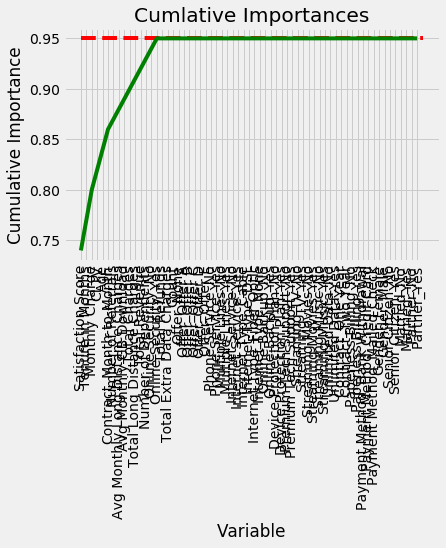

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.plot(sorted_features, cumlative_importances,'g-')
plt.hlines(y=0.95, xmin=0, xmax=len(sorted_importance),color='r',linestyles='dashed')
plt.xticks(sorted_features,rotation='vertical')
plt.xlabel('Variable');plt.ylabel('Cumulative Importance');plt.title('Cumlative Importances')

In [31]:
feature_importance#重要性结果，满意度的比重太高，可能存在一定问题

[('Satisfaction Score', 0.74),
 ('Tenure in Months', 0.03),
 ('Monthly Charge', 0.03),
 ('CLTV', 0.02),
 ('Age', 0.02),
 ('Contract_Month-to-Month', 0.02),
 ('Number of Referrals', 0.01),
 ('Avg Monthly Long Distance Charges', 0.01),
 ('Avg Monthly GB Download', 0.01),
 ('Total Charges', 0.01),
 ('Total Long Distance Charges', 0.01),
 ('Total Revenue', 0.01),
 ('Number of Dependents', 0.01),
 ('Online Security_No', 0.01),
 ('Online Security_Yes', 0.01),
 ('Total Refunds', 0.0),
 ('Total Extra Data Charges', 0.0),
 ('Count', 0.0),
 ('Offer_None', 0.0),
 ('Offer_Offer A', 0.0),
 ('Offer_Offer B', 0.0),
 ('Offer_Offer C', 0.0),
 ('Offer_Offer D', 0.0),
 ('Offer_Offer E', 0.0),
 ('Phone Service_No', 0.0),
 ('Phone Service_Yes', 0.0),
 ('Multiple Lines_No', 0.0),
 ('Multiple Lines_Yes', 0.0),
 ('Internet Service_No', 0.0),
 ('Internet Service_Yes', 0.0),
 ('Internet Type_Cable', 0.0),
 ('Internet Type_DSL', 0.0),
 ('Internet Type_Fiber Optic', 0.0),
 ('Internet Type_None', 0.0),
 ('Online B

In [27]:
x = df_pred[[ 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue','Count', 'Gender', 'Age','Senior Citizen', 'Married',
    'Number of Dependents']]

In [28]:
y = df_pred[['Satisfaction Score']]

In [29]:
x = pd.get_dummies(x)

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=SEED)

In [32]:
from sklearn.ensemble import RandomForestRegressor#考虑到满意度可能存在data leak的问题，做一次预测满意度
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(xtrain, ytrain)
predictions = rf.predict(xtest)
predictions = [round(value) for value in predictions]
mean_squared_error(ytest,predictions)#均方误差较大，不是很理想

C:\Users\gsy19\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.1497515968772178

In [33]:
df_pred['SS_pred']= rf.predict(x)

In [34]:
x = df_pred[[ 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue','Count', 'Gender', 'Age','Senior Citizen', 'Married',
    'Number of Dependents','SS_pred']]
x = pd.get_dummies(x)#考虑到满意度可能存在leak的问题，把满意度去掉或者用自行预测的满意度进行预测

In [35]:
y = df_pred[['Churn Label']]
y=y.replace('Yes', 1)
y=y.replace('No', 0)

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=SEED)
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(xtrain, ytrain)
predictions = rf.predict(xtest)
predictions = [round(value) for value in predictions]
accuracy_score(ytest,predictions)#用预测得到满意度训练模型，得到的准确率下降

C:\Users\gsy19\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8353442157558553

In [36]:
x = df_pred[[ 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue','Count', 'Gender', 'Age','Senior Citizen', 'Married',
    'Number of Dependents']]
x = pd.get_dummies(x)

In [37]:
y = df_pred[['Churn Label']]
y=y.replace('Yes', 1)
y=y.replace('No', 0)

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=SEED)
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(xtrain, ytrain)
predictions = rf.predict(xtest)
predictions = [round(value) for value in predictions]
accuracy_score(ytest,predictions)#去除满意度后的预测，准确率明显下降,但依旧可以接受

C:\Users\gsy19\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8445706174591909

In [38]:
x.columns

Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Count', 'Age', 'Number of Dependents', 'Offer_None',
       'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_Yes', 'Internet Service_No',
       'Internet Service_Yes', 'Internet Type_Cable', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Internet Type_None', 'Online Security_No',
       'Online Security_Yes', 'Online Backup_No', 'Online Backup_Yes',
       'Device Protection Plan_No', 'Device Protection Plan_Yes',
       'Premium Tech Support_No', 'Premium Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_Yes', 'Streamin

In [39]:
y = df_pred[['Satisfaction Score']]

In [40]:
df_pred['Satisfaction grade']=((df_pred['Satisfaction Score']>2)+0)#把满意度分为好评和非好评

In [41]:
y = df_pred[['Satisfaction grade']]

In [42]:
x = df_pred[[ 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score','CLTV','Count', 'Gender', 'Age','Senior Citizen', 'Married',
    'Number of Dependents','Partner']]

In [47]:
x = pd.get_dummies(x)
x.columns

Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'CLTV', 'Count', 'Age',
       'Number of Dependents', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Phone Service_No',
       'Phone Service_Yes', 'Multiple Lines_No', 'Multiple Lines_Yes',
       'Internet Service_No', 'Internet Service_Yes', 'Internet Type_Cable',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Internet Type_None',
       'Online Security_No', 'Online Security_Yes', 'Online Backup_No',
       'Online Backup_Yes', 'Device Protection Plan_No',
       'Device Protection Plan_Yes', 'Premium Tech Support_No',
       'Premium Tech Support_Yes', 'Streaming TV_No', 'Streaming TV_Yes',
       'Streaming Movies_No', 'St

In [48]:
x = x[['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue','CLTV', 'Count', 'Age',
       'Number of Dependents', 'Offer_None', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Phone Service_No',
       'Phone Service_Yes', 'Multiple Lines_No', 'Multiple Lines_Yes',
       'Internet Service_No', 'Internet Service_Yes', 'Internet Type_Cable',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Internet Type_None',
       'Online Security_No', 'Online Security_Yes', 'Online Backup_No',
       'Online Backup_Yes', 'Device Protection Plan_No',
       'Device Protection Plan_Yes', 'Premium Tech Support_No',
       'Premium Tech Support_Yes', 'Streaming TV_No', 'Streaming TV_Yes',
       'Streaming Movies_No', 'Streaming Movies_Yes', 'Streaming Music_No',
       'Streaming Music_Yes', 'Unlimited Data_No', 'Unlimited Data_Yes',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing_No', 'Paperless Billing_Yes',
       'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check', 'Gender_Female', 'Gender_Male',
       'Senior Citizen_No', 'Senior Citizen_Yes', 'Married_No', 'Married_Yes',
       'Partner_No', 'Partner_Yes']] 

In [49]:
#为了使后续逻辑回归的系数更美观，标准化数据
columns_all = ['Contract_Month-to-Month',
 'Monthly Charge',
 'Age',
 'CLTV',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Number of Referrals',
 'Total Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Tenure in Months',
 'Number of Dependents',
 'Total Refunds',
 'Total Extra Data Charges',
 'Count'] 
for i in columns_all:    
  x[i]=StandardScaler().fit_transform(x[i].values.reshape(-1,1))
x

Number of Referrals  Tenure in Months  \
0               -0.650409         -1.278988   
1               -0.317185         -0.993743   
2               -0.650409         -0.586250   
3               -0.317185         -0.301005   
4               -0.317185          0.187986   
5               -0.650409         -0.219507   
6               -0.317185         -1.278988   
7                1.348934          1.043720   
8               -0.650409         -0.708498   
9               -0.650409         -1.034492   
10              -0.650409         -0.871495   
11              -0.650409         -0.708498   
12              -0.317185         -1.278988   
13              -0.650409         -1.197489   
14              -0.650409         -0.789997   
15              -0.650409         -0.667749   
16              -0.650409         -0.993743   
17              -0.650409         -0.341755   
18              -0.650409         -1.156740   
19               0.016039         -0.015760   
20              -0.317185         -0.341755   
21              -0.650409          0.880723   
22              -0.650409         -1.238238   
23              -0.650409         -0.464002   
24              -0.650409         -0.219507   
25              -0.317185         -0.871495   
26               0.016039          0.921473   
27              -0.650409         -1.197489   
28              -0.650409         -1.278988   
29              -0.650409         -1.115991   
...                   ...               ...   
7013             2.348606          0.432481   
7014            -0.650409          1.002971   
7015            -0.650409         -0.219507   
7016            -0.650409         -0.789997   
7017            -0.650409          1.410464   
7018             2.015382          1.288216   
7019            -0.650409         -0.260256   
7020            -0.650409          0.228735   
7021             0.349263         -0.382504   
7022            -0.317185          1.206718   
7023            -0.650409          0.310234   
7024            -0.650409          0.350983   
7025            -0.650409         -1.278988   
7026            -0.650409          0.758476   
7027            -0.650409          0.269484   
7028             0.016039         -0.830746   
7029            -0.650409          1.614210   
7030             0.016039          0.473231   
7031            -0.650409         -0.586250   
7032            -0.650409         -0.789997   
7033             0.016039          1.451213   
7034            -0.650409         -1.238238   
7035            -0.650409          0.228735   
7036            -0.650409         -0.545501   
7037            -0.650409         -0.830746   
7038            -0.650409          1.614210   
7039            -0.317185         -0.341755   
7040             0.682487          1.614210   
7041            -0.317185         -0.871495   
7042            -0.650409          1.369715   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                             -1.486303                -0.612975   
1                              1.676120                -0.172176   
2                             -0.752828                 1.542040   
3                             -0.207092                -0.417064   
4                             -1.076516                -0.319109   
5                             -1.270728                -0.123199   
6                             -0.497116                 0.464533   
7                             -1.486303                 0.170667   
8                              1.366675                -0.074221   
9                              0.258370                -0.123199   
10                            -0.735997                 0.415555   
11                             0.398203                 0.415555   
12                            -1.486303                -0.417064   
13                            -1.486303                 0.366578   
14                             0.629315                -0.466042   
15 

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=SEED)
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(xtrain, ytrain)
predictions = rf.predict(xtest)
predictions = [round(value) for value in predictions]
accuracy_score(ytest,predictions)#对好评和非好评的预测，准确率为0.83

C:\Users\gsy19\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8346344925479063

Text(0.5, 1.0, 'Cumlative Importances')

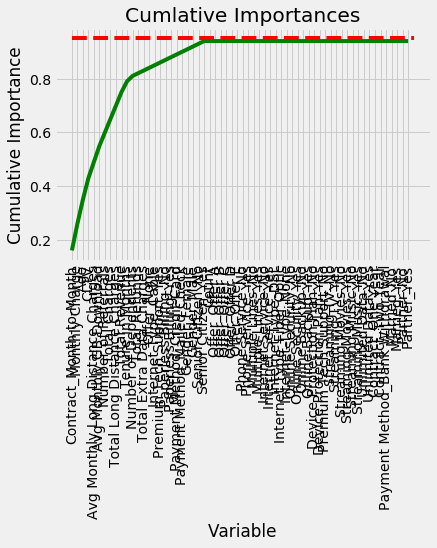

In [53]:
importances = list(rf.feature_importances_)#此rf自带的方法可返回各feature的重要性
feature_importance=[(feature, round(importance,2))for feature,importance in zip(x.columns,importances)]#将feature名和其重要性组合
feature_importance =sorted(feature_importance,key = lambda x:x[1],reverse = True)#以第二个参数进行排列，即按重要性排列
sorted_importance = [importance[1] for importance in feature_importance]#将排列好的重要性加入list中
sorted_features = [importance[0] for importance in feature_importance]#将排列好的feature名加入list中
cumlative_importances = np.cumsum(sorted_importance)#numpy中的累加函数，会进行依次累加，且将每次累加的和输出存储
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.plot(sorted_features, cumlative_importances,'g-')
plt.hlines(y=0.95, xmin=0, xmax=len(sorted_importance),color='r',linestyles='dashed')#95%的曲线，一般对影响95%的预测的feature感兴趣
plt.xticks(sorted_features,rotation='vertical')
plt.xlabel('Variable');plt.ylabel('Cumulative Importance');plt.title('Cumlative Importances')

In [54]:
feature_importance#选取可能影响满意度的几个指标，选取大于0.01的，即前12个

[('Contract_Month-to-Month', 0.16),
 ('Monthly Charge', 0.1),
 ('Age', 0.09),
 ('CLTV', 0.08),
 ('Avg Monthly Long Distance Charges', 0.06),
 ('Avg Monthly GB Download', 0.06),
 ('Number of Referrals', 0.05),
 ('Total Charges', 0.05),
 ('Total Long Distance Charges', 0.05),
 ('Total Revenue', 0.05),
 ('Tenure in Months', 0.04),
 ('Number of Dependents', 0.02),
 ('Total Refunds', 0.01),
 ('Total Extra Data Charges', 0.01),
 ('Offer_None', 0.01),
 ('Internet Type_Cable', 0.01),
 ('Premium Tech Support_Yes', 0.01),
 ('Paperless Billing_No', 0.01),
 ('Paperless Billing_Yes', 0.01),
 ('Payment Method_Credit Card', 0.01),
 ('Payment Method_Mailed Check', 0.01),
 ('Gender_Female', 0.01),
 ('Gender_Male', 0.01),
 ('Senior Citizen_No', 0.01),
 ('Senior Citizen_Yes', 0.01),
 ('Count', 0.0),
 ('Offer_Offer A', 0.0),
 ('Offer_Offer B', 0.0),
 ('Offer_Offer C', 0.0),
 ('Offer_Offer D', 0.0),
 ('Offer_Offer E', 0.0),
 ('Phone Service_No', 0.0),
 ('Phone Service_Yes', 0.0),
 ('Multiple Lines_No', 0.0

In [55]:
from sklearn.tree import export_graphviz
import pydotplus #引入可视化模块
feature_list = list(x.columns)#得到特征的列名作为可视化用的特征名
tree = rf.estimators_[5] #选择5号树进行可视化展示
export_graphviz(tree, out_file='tree.dot',feature_names = feature_list, rounded = True, precision = 1)
dot_data = export_graphviz(tree,out_file=None,feature_names=feature_list,filled=True,impurity=False,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.948476 to fit



In [53]:
x = x[['Contract_Month-to-Month',
 'Monthly Charge',
 'Age',
 'CLTV',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Number of Referrals',
 'Total Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Tenure in Months',
 'Number of Dependents']] 

In [54]:
X =sm.add_constant(x)
X

C:\Users\gsy19\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const  Contract_Month-to-Month  Monthly Charge       Age      CLTV  \
0       1.0                 0.975177       -0.834611  1.880110  0.872974   
1       1.0                 0.975177        0.528063  1.641292  0.762236   
2       1.0                 0.975177        1.019955  1.462179 -1.032395   
3       1.0                 0.975177        1.121324  1.880110  0.791822   
4       1.0                 0.975177        0.390134  1.999519 -1.358692   
5       1.0                 0.975177        0.441649  1.521884  0.200938   
6       1.0                 0.975177        0.189056  1.760701 -0.368813   
7       1.0                 0.975177       -0.646828  1.163657  0.882272   
8       1.0                 0.975177        0.322000  1.402475  1.113047   
9       1.0                 0.975177        0.388472  1.820406  0.015811   
10      1.0                 0.975177        1.004999  1.880110  1.335368   
11      1.0                 0.975177        0.320338  1.103952  0.182341   
12      1.0                 0.975177       -0.816331  1.820406  1.206878   
13      1.0                 0.975177       -0.784757  1.223361 -1.763604   
14      1.0                 0.975177        1.400506  1.283066 -1.611445   
15      1.0                 0.975177        0.986719  1.283066 -0.498993   
16      1.0                 0.975177        0.323662  1.163657 -0.046743   
17      1.0                 0.975177        0.376839  1.342770 -2.013821   
18      1.0                 0.975177        1.019955  1.641292 -0.611422   
19      1.0                 0.975177        0.336956  1.760701 -0.249622   
20      1.0                 0.975177        0.943512  1.820406 -1.849827   
21      1.0                -1.025455        0.587888  1.402475 -0.212427   
22      1.0                 0.975177        0.185733  1.641292 -1.461822   
23      1.0                 0.975177       -0.759830  1.820406  0.319284   
24      1.0                 0.975177       -1.130411  1.462179 -1.245418   
25      1.0                 0.975177       -1.489359  1.939815  1.257598   
26      1.0                 0.975177        0.687595  1.163657  0.931301   
27      1.0                 0.975177        0.551328  1.820406 -1.337558   
28      1.0                 0.975177        0.350251  1.999519  0.424105   
29      1.0                 0.975177       -1.206853  1.820406 -0.254694   
...     ...                      ...             ...       ...       ...   
7013    1.0                -1.025455       -1.339797  0.745725  0.607541   
7014    1.0                -1.025455        0.823863  0.506907 -0.118596   
7015    1.0                 0.975177        0.376839 -1.224522 -0.937718   
7016    1.0                 0.975177        0.523077 -1.463340 -0.427141   
7017    1.0                -1.025455       -1.469417 -1.105114  0.897488   
7018    1.0                -1.025455        1.350652  0.865134  0.094427   
7019    1.0                 0.975177       -0.964231 -1.284227 -1.408566   
7020    1.0                 0.975177        1.008322  0.029272  0.839160   
7021    1.0                -1.025455       -1.510962  0.805430 -1.935205   
7022    1.0                -1.025455        0.670977 -0.030433  1.611790   
7023    1.0                 0.975177        0.951821  0.447203 -0.491385   
7024    1.0                 0.975177        0.812230 -0.687182 -0.964769   
7025    1.0                 0.975177       -0.492281 -0.567773  0.701372   
7026    1.0                -1.025455       -1.466094 -1.284227  0.274481   
7027    1.0                -1.025455       -1.482712 -0.985705 -2.023119   
7028    1.0                 0.975177       -1.514286 -0.448364 -1.098331   
7029    1.0                -1.025455        1.335696 -0.090137  1.149396   
7030    1.0                 0.975177        0.665992  0.387498 -1.378134   
7031    1.0                 0.975177        1.006660  0.268089  0.104571   
7032    1.0                 0.975177        0.285440  1.044248  0.206855   
7033    1.0                -1.025455       -0.021992 -

In [64]:
result = sm.Logit(y,X).fit()#逻辑回归的系数可以帮助我们判别判断依据，以及影响方向
print(result.summary())#逻辑回归结果如下表所示

Optimization terminated successfully.
         Current function value: 0.366089
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     Satisfaction grade   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7030
Method:                           MLE   Df Model:                           12
Date:                Tue, 06 Apr 2021   Pseudo R-squ.:                  0.2772
Time:                        17:53:42   Log-Likelihood:                -2578.4
converged:                       True   LL-Null:                       -3567.4
                                        LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.3380      0.066     35

In [65]:
df_pred.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Partner', 'SS_pred',
       'Satisfaction grade'],
      dtype='object')

In [66]:
df_show = df_pred[['Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Partner']]

In [67]:
df_show = pd.get_dummies(df_show)

In [68]:
pd.set_option('display.max_columns',100)

In [69]:
df_show = df_show.groupby(['Satisfaction Score']).mean()

In [70]:
#不同满意度对应关键指标的差异，得到的结论和逻辑回归一致。
df_show[['Contract_Month-to-Month',
 'Monthly Charge',
 'Age',
 'Avg Monthly GB Download',
 'Number of Referrals',
 'Tenure in Months',
 'Number of Dependents',]]

Contract_Month-to-Month  Monthly Charge        Age  \
Satisfaction Score                                                       
1                                  0.904555       75.814588  49.334056   
2                                  0.888031       73.464865  50.573359   
3                                  0.439775       66.231932  45.949719   
4                                  0.348239       61.906260  45.574064   
5                                  0.453438       53.004656  45.167102   

                    Avg Monthly GB Download  Number of Referrals  \
Satisfaction Score                                                 
1                                 23.468547             0.549892   
2                                 20.523166             0.565637   
3                                 21.504690             2.246154   
4                                 20.325880             2.487423   
5                                 16.142733             2.185379   

                    Tenure in Months  Number of Dependents  
Satisfaction Score                                          
1                          18.663774              0.130152  
2                          17.291506              0.100386  
3                          36.019512              0.529456  
4                          38.523197              0.609279  
5                          32.223673              0.546562

In [71]:
df_pred['Oldcustomer']=((df_pred['Tenure in Months']>=24)+0)

In [72]:
df_show2 = df_pred[['Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Partner','Oldcustomer']]

In [73]:
df_show2 = pd.get_dummies(df_show2)

In [74]:
df_show2 = df_show2.groupby(['Oldcustomer']).mean()

In [75]:
df_show2[['Contract_Month-to-Month',
 'Monthly Charge',
 'Age',
 'Avg Monthly GB Download',
 'Number of Referrals',
 'Tenure in Months',
 'Number of Dependents','Satisfaction Score']]

Contract_Month-to-Month  Monthly Charge        Age  \
Oldcustomer                                                       
0                           0.817394       57.667940  46.118100   
1                           0.270690       70.390451  46.820474   

             Avg Monthly GB Download  Number of Referrals  Tenure in Months  \
Oldcustomer                                                                   
0                          19.470475             1.041078          8.661425   
1                          21.344538             2.674561         51.212376   

             Number of Dependents  Satisfaction Score  
Oldcustomer                                            
0                        0.371951            2.987163  
1                        0.545455            3.449453

In [55]:
from sklearn import tree

In [68]:
dtr = tree.DecisionTreeClassifier(max_depth = 3)

In [69]:
dtr.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [70]:
import pydotplus
from IPython.display import Image

In [71]:
X.columns

Index(['const', 'Contract_Month-to-Month', 'Monthly Charge', 'Age', 'CLTV',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Number of Referrals', 'Total Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Tenure in Months', 'Number of Dependents'],
      dtype='object')

In [72]:
y.columns

Index(['Satisfaction grade'], dtype='object')

In [73]:
classes=['lower_rate','high_rate']

In [74]:
dot_data = tree.export_graphviz(dtr,out_file=None,feature_names=X.columns,class_names=classes,filled=True,impurity=False,rounded=True)

In [75]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [76]:
graph.get_nodes()[7].set_fillcolor("#FFF2DD")

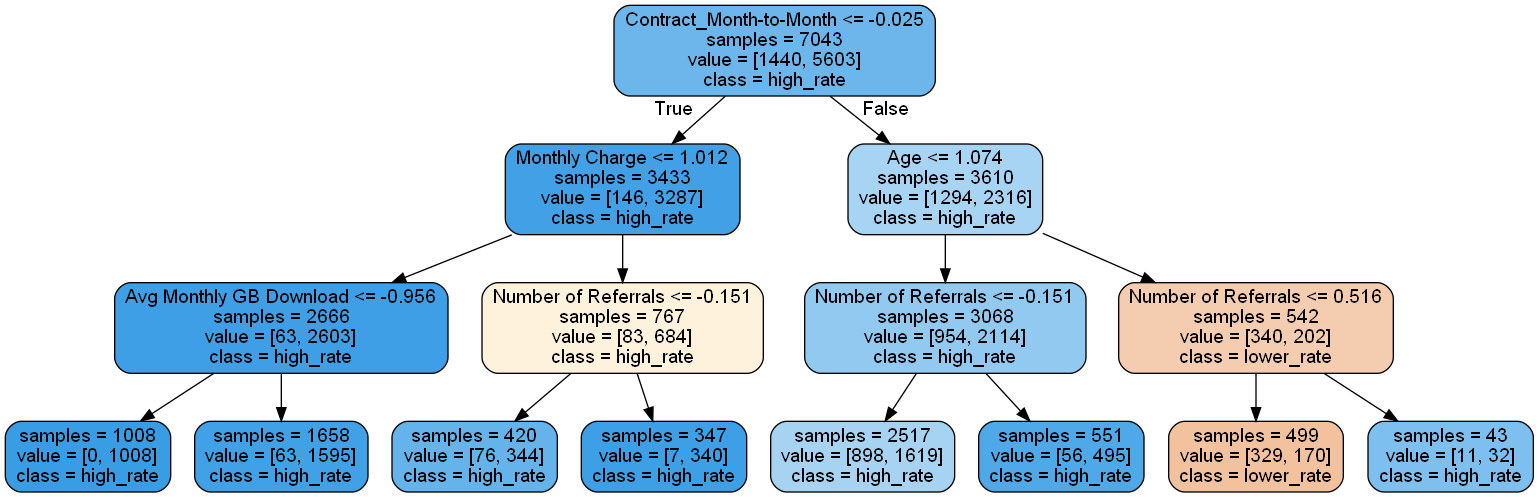

In [77]:
Image(graph.create_png())#可视化树回归，通过判断的条件以及结果分部发现可能存在问题的业务